# A rough spellchecker on Brazilian Portuguese

This notebook is an attempt to create a very simple brazilian-portuguese spellchecker. It's inspired on [Peter Norvig's](https://norvig.com/) [famous essay](https://norvig.com/spell-correct.html) on the subject and follows the same logic of [this](https://nbviewer.org/url/norvig.com/ipython/How%20to%20Do%20Things%20with%20Words.ipynb) notebook of his.

In [76]:
%pylab inline
import re
import math
import string
from collections import Counter
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


/Users/TiagoMuzzi/Documents/environments/project1_env/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


I start with a big .txt file, a collection of many books.

In [77]:
big = open("big.txt").read()

In [78]:
len(big)

10979444

it's made up of almost 11 million characters. How many words are there?

In [79]:
def tokens(text):
    "a list of all word tokens (consecutive letters bundled together)"
    return re.findall('[a-z_À-ÿ]+', text.lower())

In [80]:
tokens('testing: to see, if this 1 2 works')

['testing', 'to', 'see', 'if', 'this', 'works']

In [81]:
WORDS = tokens(big)
len(WORDS)

1728255

1.72 million words, the first 10 being:

In [82]:
WORDS[:10]

['dom',
 'casmurro',
 'machado',
 'de',
 'assis',
 'capítulo',
 'primeiro',
 'do',
 'título',
 'uma']

Now we make a ```Counter``` for the ```WORDS``` list

In [83]:
COUNTS = Counter(WORDS)
COUNTS.most_common(10)

[('de', 92446),
 ('a', 59853),
 ('o', 47207),
 ('que', 42196),
 ('e', 40125),
 ('do', 37411),
 ('em', 28249),
 ('da', 27050),
 ('se', 21200),
 ('é', 17898)]

In [84]:
for w in tokens('haja palavra rara nesse textão aí'):
    print (COUNTS[w], w)

44 haja
208 palavra
7 rara
874 nesse
0 textão
92 aí


Here is a formulation of [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law):

_"given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table."_

Since we have a big file of PTB utterances, Let's test the law to see if it holds:

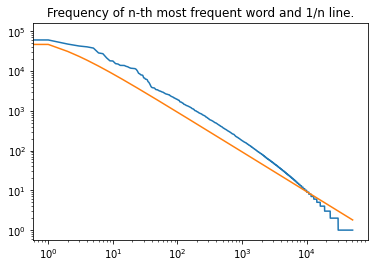

In [85]:
M = COUNTS['de']
yscale('log'); xscale('log'); title('Frequency of n-th most frequent word and 1/n line.')
plot([c for (w,c) in COUNTS.most_common()])
plot([M/i for i in range(1, len(COUNTS)+1)]);
     
     

# Spelling Correction

given a word w, find the most likely correction c= ```correct(w)```.

The idea is to get a list of all candidates ```c``` that are known words and that are near w.

"near" means either one edit away or two edits away.\
"likely" is defined by the ```WORDS``` count of any given word.

Let us write these functions:

In [86]:
def correct(word):
    "find the best spelling correction for a word"
    # Prefer edit distance 0, then 1, then 2; otherwise default to word itself.
    candidates = (known(edits0(word)) or
                  known(edits1(word)) or
                  known(edits2(word)) or
                  [word])
    return max(candidates, key=COUNTS.get)

we'll leave the ```edits1``` function for a bit later...

In [88]:
def known(words):
    "return the subset of words that are in the dictionary"
    return {w for w in words if w in COUNTS}

def edits0(word):
    "return all strings zero edits away from word"
    return {word}

def edits2(word):
    "return all strings two edits away from word"
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}
    

|  |  |
| --- | ----------- |
| Header | Title |
| Paragraph | Text |